In [11]:
import numpy as np
import pandas as pd

In [3]:
import os

directory = os.getcwd()
data = pd.read_csv(directory + '/EMS_2017_2018.csv', sep=',') 
data = pd.DataFrame(data)

In [4]:
data.head()

,Unnamed: 0,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,...,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,Incident_Time,Incident_Date
0,0,183654386,12/31/2018 11:59:46 PM,CARDBR,2,CARDBR,2,12/31/2018 11:59:54 PM,Y,8,...,35.0,302.0,13.0,8.0,N,N,N,N,12/31/2018,11:59:46 PM
1,1,183654385,12/31/2018 11:59:20 PM,MVAINJ,4,MVAINJ,4,01/01/2019 12:01:10 AM,Y,110,...,32.0,409.0,27.0,7.0,N,N,N,N,12/31/2018,11:59:20 PM
2,2,183654384,12/31/2018 11:58:45 PM,SICK,6,SICK,6,01/01/2019 12:00:43 AM,Y,118,...,21.0,480.0,30.0,14.0,N,N,N,N,12/31/2018,11:58:45 PM
3,3,183654383,12/31/2018 11:58:14 PM,INJMAJ,3,INJMAJ,3,12/31/2018 11:58:22 PM,Y,8,...,47.0,311.0,20.0,11.0,N,N,N,N,12/31/2018,11:58:14 PM
4,4,183654382,12/31/2018 11:57:42 PM,UNC,2,UNC,2,01/01/2019 12:00:39 AM,Y,177,...,4.0,105.0,2.0,12.0,N,N,N,N,12/31/2018,11:57:42 PM


In [5]:
data.shape

(3001488, 34)

***Converting Times to DATETIME***

In [6]:
import time
from time import mktime
from datetime import datetime as dt

In [7]:
data["FIRST_ASSIGNMENT_DATETIME"] = pd.to_datetime(data["FIRST_ASSIGNMENT_DATETIME"])

In [8]:
data["INCIDENT_DATETIME"] = pd.to_datetime(data["INCIDENT_DATETIME"])

In [9]:
data.head()

,Unnamed: 0,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,...,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,Incident_Time,Incident_Date
0,0,183654386,2018-12-31 23:59:46,CARDBR,2,CARDBR,2,2018-12-31 23:59:54,Y,8,...,35.0,302.0,13.0,8.0,N,N,N,N,12/31/2018,11:59:46 PM
1,1,183654385,2018-12-31 23:59:20,MVAINJ,4,MVAINJ,4,2019-01-01 00:01:10,Y,110,...,32.0,409.0,27.0,7.0,N,N,N,N,12/31/2018,11:59:20 PM
2,2,183654384,2018-12-31 23:58:45,SICK,6,SICK,6,2019-01-01 00:00:43,Y,118,...,21.0,480.0,30.0,14.0,N,N,N,N,12/31/2018,11:58:45 PM
3,3,183654383,2018-12-31 23:58:14,INJMAJ,3,INJMAJ,3,2018-12-31 23:58:22,Y,8,...,47.0,311.0,20.0,11.0,N,N,N,N,12/31/2018,11:58:14 PM
4,4,183654382,2018-12-31 23:57:42,UNC,2,UNC,2,2019-01-01 00:00:39,Y,177,...,4.0,105.0,2.0,12.0,N,N,N,N,12/31/2018,11:57:42 PM


***Summary Statistics***

In [10]:
def getDfSummary(input_data):
    stats = pd.DataFrame(input_data.describe(include=[np.number]).transpose()) #stats but only include #s
    number_nan = pd.DataFrame(input_data.isna().sum(),columns = ['number_nan']) #NaN value count
    number_distinct = pd.DataFrame(input_data.nunique(),columns = ['number_distinct']) #unique values
    output_data = pd.concat([stats, number_nan, number_distinct], axis=1) #axis=1: stack to right of first col
    output_data = output_data.drop("count", axis = 1)
    return output_data

Summary statistics are only useful for numeric data, so in our case, it is only useful for the duration data: `DISPATCH_RESPONSE_SECONDS_QY`, `INCIDENT_RESPONSE_SECONDS_QY`, `INCIDENT_TRAVEL_TM_SECONDS_QY`. The minimum value of all 3 of these durations is 0, therefore indicating that EMS was already on site or on standby.

Time-stamped data does not produce useful summary statistics except in the case of seeing how many missing values and unique values we have. This is for the following: `FIRST_ACTIVATION_DATETIME`,`FIRST_ASSIGNMENT_DATETIME`, `FIRST_HOSP_ARRIVAL_DATETIME`, `FIRST_ON_SCENE_DATETIME`, `FIRST_TO_HOSP_DATETIME`, `INCIDENT_CLOSE_DATETIME`, `INCIDENT_DATETIME`.

Categorical data does not produce useful summary statistics either, excpet in the case of showing missing values and unique values. This is for the following: `BOROUGH`, `CITYCOUNCILDISTRICT`, `COMMUNITYDISTRICT`, `COMMUNITYSCHOOLDISTRICT`, `CONGRESSIONALDISTRICT `, `FINAL_CALL_TYPE `, `FINAL_SEVERITY_LEVEL_CODE`, `INCIDENT_DISPATCH_AREA`, `INCIDENT_DISPOSITION_CODE`, `INITAL_CALL_TYPE`, `INITIAL_SEVERITY_LEVEL_CODE `, `POLICEPRECINCT`, `ZIPCODE `.

Binary data does not produce useful summary statistics, except to show how many missing values exist. This is for the following: `HELD_INDICATOR`, `REOPEN_INDICATOR`, `SPECIAL_EVENT_INDICATOR`, `STANDBY_INDICATOR`, `TRANSFER_INDICATOR`, `VALID_DISPATCH_RSPNS_TIME_INDC`, `VALID_INDICDENT_RSPNS_TIME_INDC`.

We should only use incidents where these indicators are true: `VALID_DISPATCH_RSPNS_TIME_INDC`, and `VALID_INCIDENT_RSPNS_TIME_INDC`, 


In [11]:
getDfSummary(data)

/Users/amandarella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,mean,std,min,25%,50%,75%,max,number_nan,number_distinct
BOROUGH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6
CAD_INCIDENT_ID,1.769487e+08,5.101642e+06,170010001.0,1.718826e+08,180083308.5,1.818711e+08,183654386.0,0,3001488
CITYCOUNCILDISTRICT,2.286989e+01,1.498182e+01,1.0,9.000000e+00,20.0,3.600000e+01,51.0,38938,51
COMMUNITYDISTRICT,2.602660e+02,1.181678e+02,101.0,1.120000e+02,301.0,3.170000e+02,595.0,38831,71
COMMUNITYSCHOOLDISTRICT,1.464839e+01,9.614933e+00,1.0,6.000000e+00,13.0,2.300000e+01,32.0,41389,32
CONGRESSIONALDISTRICT,1.064885e+01,3.332767e+00,3.0,8.000000e+00,11.0,1.300000e+01,16.0,38938,13
DISPATCH_RESPONSE_SECONDS_QY,7.093197e+01,5.070557e+02,0.0,1.100000e+01,18.0,3.500000e+01,32332.0,0,7077
FINAL_CALL_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,126
FINAL_SEVERITY_LEVEL_CODE,4.177328e+00,1.725233e+00,1.0,3.000000e+00,4.0,6.000000e+00,8.0,0,8
FIRST_ACTIVATION_DATETIME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20328,2907100


***ASSIGNMENT DATETIME***

***Number of Incidents per Time Assigned***


Binning Assignment dates/times to determine which bins to use for modeling.  Likely best to just use every hour interval so as to not bias the data and group too many incidents together. Bins are created by default in Python using optimal # of bins. Too many bins are created this way so we can see what it looks like when we have 24 bins (1 to represent each hour). Rather than subjectively choose time intervals to represent morning, afternoon, evening, rush hour, etc, may be best to just use 1 hour intervals otherwise we may introduce bias into the model.

In [12]:
#Converting time to a number between 0 and 24
t_s = data["FIRST_ASSIGNMENT_DATETIME"].dt.hour+data["FIRST_ASSIGNMENT_DATETIME"].dt.minute/60+(data["FIRST_ASSIGNMENT_DATETIME"].dt.second/60/100)


In [13]:
#some nan values because there are missing assignment times
#if there is no assignment time, we are not interested because that means the incident was never assigned and therefore no response time
#drop the nan values so we can see count of assignment times from 0 - 24 and create appropriate bins
t_s = t_s.dropna()
count_nan = len(t_s) - t_s.count()
count_nan

0

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(t_s, hist=True, kde=False, rug=False, label='Bins: Default')
sns.distplot(t_s, hist=True, kde=False, rug=False, bins=24, label='Bins: 24')
plt.xticks(np.arange(1,25))
plt.xlim(0,24)
plt.xlabel("Time Assigned (hr)")
plt.ylabel("Number of Incidents")
plt.legend()
plt.show()

NameError: name 't_s' is not defined

***Coding Time Bins per Hour***

In [15]:
bins = dict(zip(pd.date_range('2010-01-01', '2010-01-01 23:59:59', freq='60T').hour, range(24)))

In [16]:
data['Time_Code'] = data["FIRST_ASSIGNMENT_DATETIME"].dt.hour.map(bins)

In [17]:
data.head()

,Unnamed: 0,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,...,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,Incident_Time,Incident_Date,Time_Code
0,0,183654386,2018-12-31 23:59:46,CARDBR,2,CARDBR,2,2018-12-31 23:59:54,Y,8,...,302.0,13.0,8.0,N,N,N,N,12/31/2018,11:59:46 PM,23.0
1,1,183654385,2018-12-31 23:59:20,MVAINJ,4,MVAINJ,4,2019-01-01 00:01:10,Y,110,...,409.0,27.0,7.0,N,N,N,N,12/31/2018,11:59:20 PM,0.0
2,2,183654384,2018-12-31 23:58:45,SICK,6,SICK,6,2019-01-01 00:00:43,Y,118,...,480.0,30.0,14.0,N,N,N,N,12/31/2018,11:58:45 PM,0.0
3,3,183654383,2018-12-31 23:58:14,INJMAJ,3,INJMAJ,3,2018-12-31 23:58:22,Y,8,...,311.0,20.0,11.0,N,N,N,N,12/31/2018,11:58:14 PM,23.0
4,4,183654382,2018-12-31 23:57:42,UNC,2,UNC,2,2019-01-01 00:00:39,Y,177,...,105.0,2.0,12.0,N,N,N,N,12/31/2018,11:57:42 PM,0.0


In [18]:
import collections
from collections import Counter

In [19]:
t_code = collections.Counter(data["Time_Code"])
tot_t_code = sum(t_code.values())

In [20]:
t_code

Counter({23.0: 118763,
         0.0: 106334,
         nan: 1,
         nan: 1,
         22.0: 134212,
         nan: 1,
         nan: 1,
         21.0: 143504,
         nan: 1,
         nan: 1,
         nan: 1,
         20.0: 148395,
         19.0: 152633,
         nan: 1,
         18.0: 155061,
         nan: 1,
         17.0: 156545,
         16.0: 158481,
         15.0: 158034,
         nan: 1,
         14.0: 157767,
         nan: 1,
         nan: 1,
         13.0: 158046,
         nan: 1,
         12.0: 157158,
         nan: 1,
         11.0: 154189,
         10.0: 148573,
         nan: 1,
         nan: 1,
         9.0: 137802,
         nan: 1,
         8.0: 113035,
         7.0: 86170,
         6.0: 67785,
         nan: 1,
         5.0: 61675,
         4.0: 66567,
         3.0: 71813,
         2.0: 80218,
         1.0: 92772,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
      

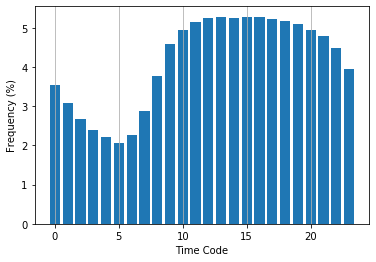

In [21]:
t_code = {k: (v*100) / tot_t_code for k, v in t_code.items()} #mult by 100 to turn into percent
plt.bar(t_code.keys(),t_code.values())
plt.grid(axis = 'x')
plt.xlabel("Time Code")
plt.ylabel("Frequency (%)")
plt.show()

***INCIDENT TRAVEL TIME vs TIME ASSIGNED***

In [22]:
import warnings
warnings.filterwarnings("ignore")

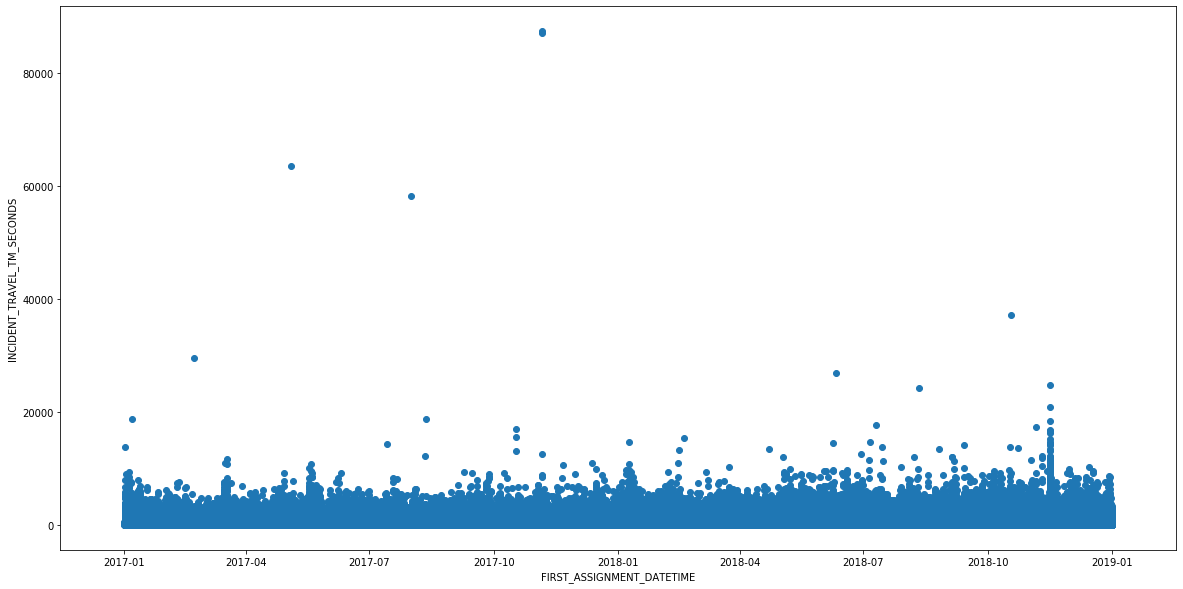

In [23]:
#Travel Response time over every incident time
plt.figure(figsize =(20,10))
plt.scatter(data["FIRST_ASSIGNMENT_DATETIME"],data['INCIDENT_TRAVEL_TM_SECONDS_QY'])
plt.xlabel("FIRST_ASSIGNMENT_DATETIME")
plt.ylabel("INCIDENT_TRAVEL_TM_SECONDS")
plt.show()

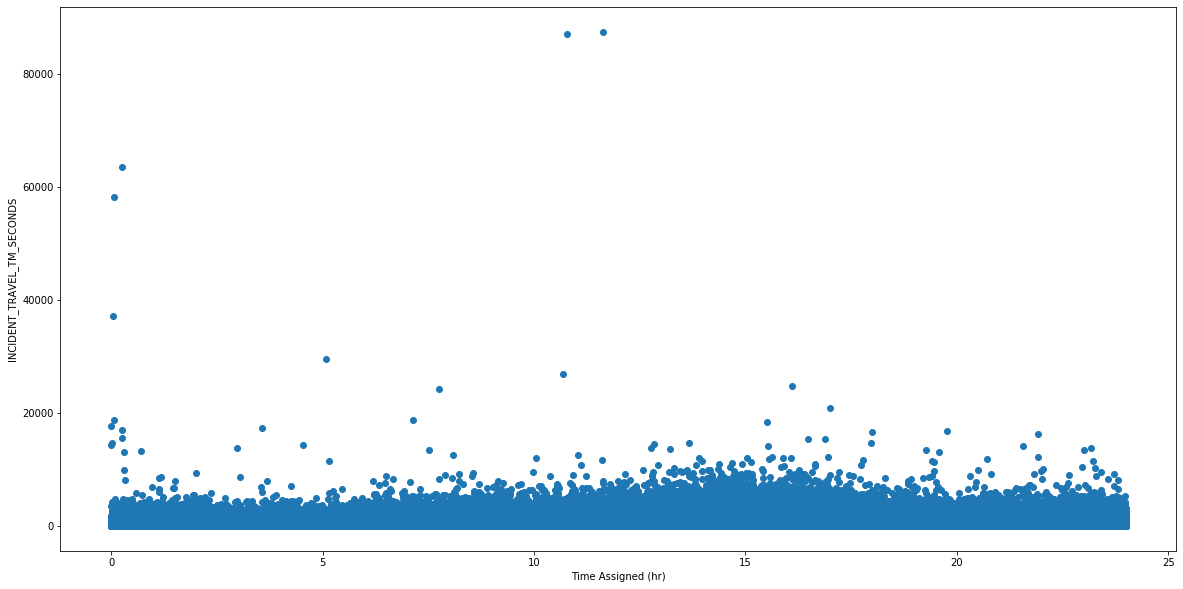

In [24]:
plt.figure(figsize =(20,10))
plt.scatter((data["FIRST_ASSIGNMENT_DATETIME"].dt.hour+data["FIRST_ASSIGNMENT_DATETIME"].dt.minute/60+(data["FIRST_ASSIGNMENT_DATETIME"].dt.second/60/100)
),data['INCIDENT_TRAVEL_TM_SECONDS_QY'])
plt.xlabel("Time Assigned (hr)")
plt.ylabel("INCIDENT_TRAVEL_TM_SECONDS")
plt.show()

***INCIDENT TRAVEL TIME (all data)***

Incident travel times are comprised of many outliers. We will need to perform data reduction to get rid of some outliers without introducing bias in the model. We can look at the statistics produced based on boxplots. Deleting incidents with travel times > 2hrs does not change any of the statistics. There are only 296 incidents with > 2hrs travel times.

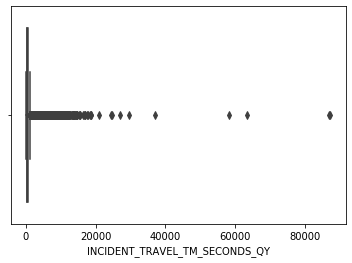

In [25]:
sns.boxplot(data['INCIDENT_TRAVEL_TM_SECONDS_QY'])


In [26]:
data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe()

count    2.911262e+06
mean     4.901194e+02
std      3.917800e+02
min      0.000000e+00
25%      2.830000e+02
50%      4.060000e+02
75%      5.830000e+02
max      8.738600e+04
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

In [27]:
##calculating outliers; any travel times greater than this in seconds
data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe(include='all').loc['75%']+1.5*(data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe(include='all').loc['75%']-data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe(include='all').loc['25%'])

1033.0

In [28]:
#Count num of instances that have travel response times > 1033 s (outliers)
data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] > 1033].count()['INCIDENT_TRAVEL_TM_SECONDS_QY']

175061

***Incident Travel Time (smaller window)***

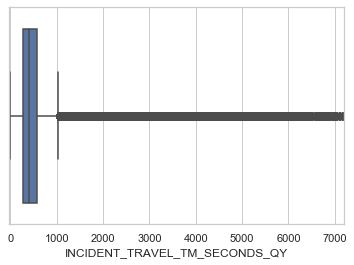

In [29]:
sns.set(style = "whitegrid")
plt.xlim(-20,7200)
sns.boxplot(data['INCIDENT_TRAVEL_TM_SECONDS_QY'])


***Incident Travel Time without T> 2hrs***

In [30]:
#Count num of instances that have travel response time greater than 2 hours
data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] > 7200].count()['INCIDENT_TRAVEL_TM_SECONDS_QY']

296

In [31]:
#Drop rows where T>2hrs
t_condensed = data.drop(data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] > 7200].index)

In [32]:
#create series with just T>2hrs
t_condensed = t_condensed['INCIDENT_TRAVEL_TM_SECONDS_QY']

In [33]:
t_condensed.head()

0    453.0
1    369.0
2    815.0
3    348.0
4    861.0
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

In [34]:
#check if 296 rows were deleted
t_condensed.shape

(3001192,)

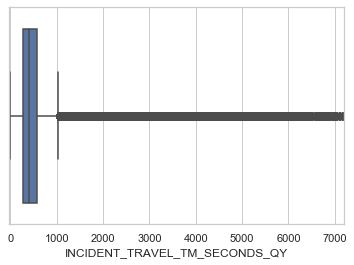

In [35]:
sns.set(style = "whitegrid")
plt.xlim(-20,7200)
sns.boxplot(t_condensed)


In [36]:
#deleting T>2hrs did not change distribution by much
t_condensed.describe()

count    2.910966e+06
mean     4.890818e+02
std      3.685603e+02
min      0.000000e+00
25%      2.830000e+02
50%      4.050000e+02
75%      5.830000e+02
max      7.195000e+03
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

***Incident Travel Time where T>2hr values occur***

Looking at where Incident travel times are >2hrs, it is very random - no specific patterns except some unusal behaviour on Nov 15, 2018. After further inspection, there was a significant snowstorm that day causing major delays.

In [37]:
t_outliers = data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] > 7200]

In [38]:
t_outliers.shape

(296, 35)

In [39]:
t_outliers.head()

,Unnamed: 0,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,...,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,Incident_Time,Incident_Date,Time_Code
7613,7613,183640226,2018-12-30 01:06:15,SICK,6,SICK,6,2018-12-30 01:07:08,Y,53,...,206.0,12.0,15.0,N,N,N,N,12/30/2018,01:06:15 AM,1.0
8188,8188,183634004,2018-12-29 22:04:09,EDP,7,EDP,7,2018-12-29 22:20:36,Y,987,...,206.0,10.0,15.0,N,N,N,N,12/29/2018,10:04:09 PM,22.0
11264,11264,183630598,2018-12-29 03:40:27,SICMIN,7,SICMIN,7,2018-12-29 03:41:03,Y,36,...,204.0,9.0,15.0,N,N,N,N,12/29/2018,03:40:27 AM,3.0
11357,11357,183630494,2018-12-29 02:59:04,SICK,6,SICK,6,2018-12-29 03:02:47,Y,223,...,205.0,10.0,15.0,N,N,N,N,12/29/2018,02:59:04 AM,3.0
21993,21993,183602253,2018-12-26 14:05:26,EDP,7,EDP,7,2018-12-26 14:12:25,Y,419,...,203.0,12.0,15.0,N,N,N,N,12/26/2018,02:05:26 PM,14.0


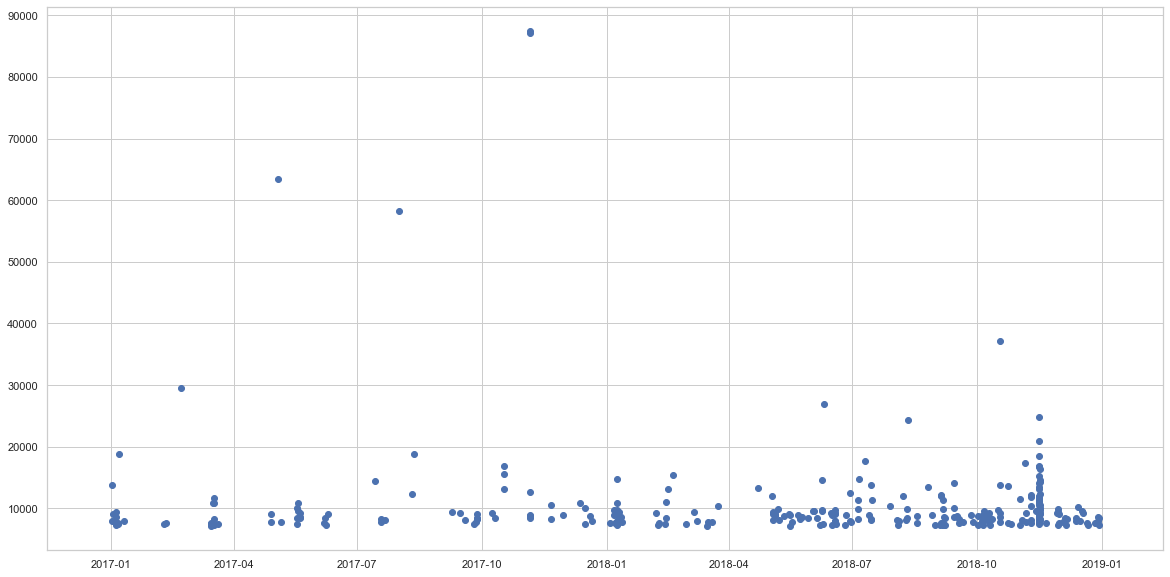

In [40]:
plt.figure(figsize =(20,10))
plt.scatter(t_outliers["FIRST_ASSIGNMENT_DATETIME"],t_outliers['INCIDENT_TRAVEL_TM_SECONDS_QY'])

***What is happening Nov 15, 2018?***

(737012.0, 737016.0)

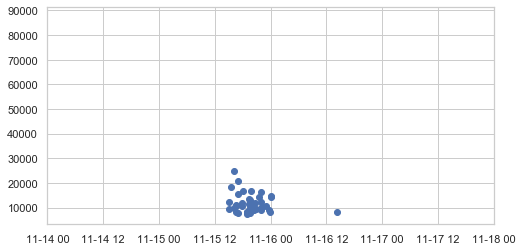

In [41]:
plt.figure(figsize =(8,4))
plt.scatter(t_outliers["FIRST_ASSIGNMENT_DATETIME"],t_outliers['INCIDENT_TRAVEL_TM_SECONDS_QY'])
plt.xlim('2018-11-14 00:00:00','2018-11-18 00:00:00')

In [42]:
res = t_outliers.loc[(t_outliers["FIRST_ASSIGNMENT_DATETIME"]>'2018-11-14 00:00:00')&(t_outliers["FIRST_ASSIGNMENT_DATETIME"]<'2018-11-16 00:00:00') ]


In [43]:
res.head()

,Unnamed: 0,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,...,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,Incident_Time,Incident_Date,Time_Code
186042,186042,183194424,2018-11-15 21:57:32,DIFFBR,2,DIFFBR,2,2018-11-15 22:00:08,Y,156,...,206.0,12.0,15.0,N,N,N,N,11/15/2018,09:57:32 PM,22.0
186093,186093,183194363,2018-11-15 21:42:38,DRUG,4,DRUG,4,2018-11-15 21:49:59,Y,441,...,209.0,11.0,14.0,N,N,N,N,11/15/2018,09:42:38 PM,21.0
186101,186101,183194353,2018-11-15 21:39:40,COLD,5,INJURY,5,2018-11-15 22:02:57,Y,1397,...,112.0,6.0,13.0,N,N,N,N,11/15/2018,09:39:40 PM,22.0
186327,186327,183194102,2018-11-15 20:43:30,SICK,6,DIFFBR,2,2018-11-15 21:34:32,Y,3062,...,NaN,NaN,NaN,N,N,N,N,11/15/2018,08:43:30 PM,21.0
186330,186330,183194098,2018-11-15 20:42:51,SICK,6,SICK,6,2018-11-15 20:43:28,Y,37,...,112.0,6.0,13.0,N,N,N,N,11/15/2018,08:42:51 PM,20.0


***TRAVEL TIME BINNED***

Further inspecting travel times, the data will need to be binned to view any useful trends. Binning the data every 5 min increment until 30min is useful. Based on statistics, any values > ~18min are considered to be outliers. It is still important to look at values up to ~30min which are still possibly valid. We can also group all incident travel times > 30min, and all nan values to see the distributions. We can look at the "global" distribution across NYC, and then the "local" distributions across each borough. Although we can see the distribution of travel times in each borough, it does not show us the corresponding severity level which is important to know if EMS reached the incident within a "reasonable" amount of time. We can plot each time travel bin with their corresponding initial severity level codes to see how they relate. We should expect lower initial severity levels (ie. 1,2..) to have much quicker travel times, and higher initial severity levels (ie. 7, 8, 9...) should have slower severity level times because EMS knew they were not to be prioritized over the more severe cases.

In [44]:
bins = [0,5*60,10*60,15*60,20*60,25*60,30*60,max(data['INCIDENT_TRAVEL_TM_SECONDS_QY'])]

In [45]:
labels = [1,2,3,4,5,6,7]

In [46]:
data["Travel_Time_Code"]=pd.cut(data['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins=bins,labels=labels)

In [47]:
data.head()

,Unnamed: 0,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,...,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,Incident_Time,Incident_Date,Time_Code,Travel_Time_Code
0,0,183654386,2018-12-31 23:59:46,CARDBR,2,CARDBR,2,2018-12-31 23:59:54,Y,8,...,13.0,8.0,N,N,N,N,12/31/2018,11:59:46 PM,23.0,2
1,1,183654385,2018-12-31 23:59:20,MVAINJ,4,MVAINJ,4,2019-01-01 00:01:10,Y,110,...,27.0,7.0,N,N,N,N,12/31/2018,11:59:20 PM,0.0,2
2,2,183654384,2018-12-31 23:58:45,SICK,6,SICK,6,2019-01-01 00:00:43,Y,118,...,30.0,14.0,N,N,N,N,12/31/2018,11:58:45 PM,0.0,3
3,3,183654383,2018-12-31 23:58:14,INJMAJ,3,INJMAJ,3,2018-12-31 23:58:22,Y,8,...,20.0,11.0,N,N,N,N,12/31/2018,11:58:14 PM,23.0,2
4,4,183654382,2018-12-31 23:57:42,UNC,2,UNC,2,2019-01-01 00:00:39,Y,177,...,2.0,12.0,N,N,N,N,12/31/2018,11:57:42 PM,0.0,3


***ALL NYC***

In [49]:
travel_nyc = collections.Counter(data["Travel_Time_Code"])
tot_travel_nyc = sum(travel_nyc.values()) #counts of each travel time code
travel_nyc = sorted(travel_nyc.items()) #sort so it lines up with the labels
travel_nyc

[(1, 803125),
 (2, 1396730),
 (3, 431656),
 (4, 133136),
 (5, 54959),
 (6, 25863),
 (7, 35717),
 (nan, 120302)]

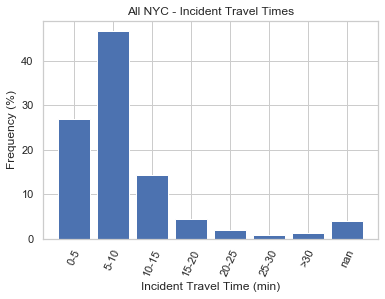

In [50]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30","nan")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins))])

ax.bar(idx, [x[1]*100/tot_travel_nyc for x in travel_nyc])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Frequency (%)')
plt.title("All NYC - Incident Travel Times")

plt.show()

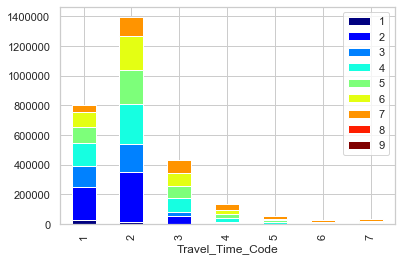

In [51]:
cmp = plt.cm.get_cmap('jet')

travel_nyc_code = data.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_nyc_code_sum = travel_nyc_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_nyc_code.reindex(index=travel_nyc_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap = cmp)
plt.legend(loc=1)
plt.show()

***Brooklyn***

In [53]:
tot_travel_bk = sum(travel_bk.values())
travel_bk = sorted(list(travel_bk.items()))

In [60]:
travel_bk = collections.Counter(data[data["BOROUGH"]=="BROOKLYN"].Travel_Time_Code)
tot_travel_bk = sum(travel_bk.values())
travel_bk = sorted(list(travel_bk.items()))
travel_bk.append(travel_bk.pop(-2))
travel_bk

[(1, 218042),
 (2, 391009),
 (3, 125891),
 (4, 40788),
 (5, 17026),
 (6, 7932),
 (7, 10144),
 (nan, 28504)]

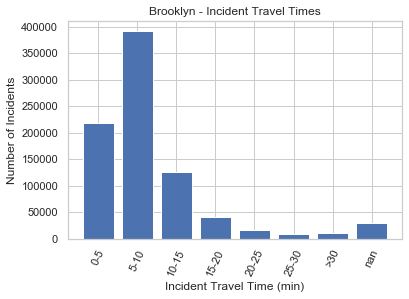

In [61]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30","nan")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins))])

ax.bar(idx, [x[1] for x in travel_bk])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Number of Incidents')
plt.title("Brooklyn - Incident Travel Times")

plt.show()

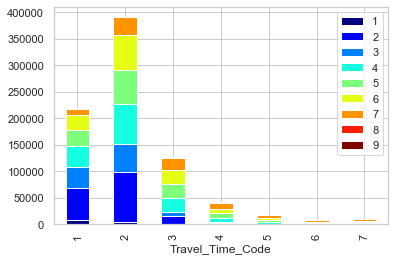

In [62]:
travel_bk_code = data.loc[data["BOROUGH"]=="BROOKLYN"] #filter specifically for rows only with BK first
travel_bk_code = travel_bk_code.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_bk_code_sum = travel_bk_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_bk_code.reindex(index=travel_bk_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.legend(loc=1)
plt.show()

***Bronx***

In [57]:
travel_brx = collections.Counter(data[data["BOROUGH"]=="BRONX"].Travel_Time_Code)
tot_travel_brx = sum(travel_brx.values())
travel_brx = sorted(travel_brx.items())
travel_brx

[(1, 165854),
 (2, 328601),
 (3, 111556),
 (4, 34876),
 (5, 14630),
 (6, 6935),
 (7, 9424),
 (nan, 26660)]

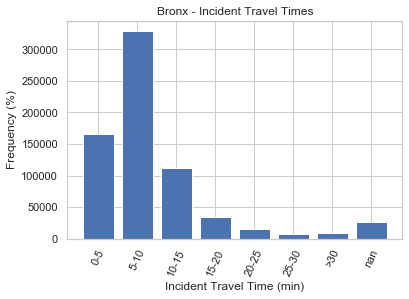

In [63]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30","nan")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins))])

ax.bar(idx, [x[1] for x in travel_brx])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Frequency (%)')
plt.title("Bronx - Incident Travel Times")

plt.show()

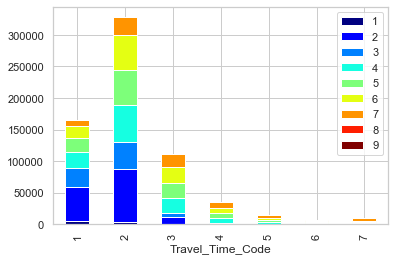

In [64]:
travel_brx_code = data.loc[data["BOROUGH"]=="BRONX"] #filter specifically for rows only with BK first
travel_brx_code = travel_brx_code.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_brx_code_sum = travel_brx_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_brx_code.reindex(index=travel_brx_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.legend(loc=1)
plt.show()

***Manhattan***

In [65]:
travel_mht = collections.Counter(data[data["BOROUGH"]=="MANHATTAN"].Travel_Time_Code)
tot_travel_mht = sum(travel_mht.values())
travel_mht = sorted(travel_mht.items())
travel_mht

[(1, 214542),
 (2, 326461),
 (3, 106914),
 (4, 36988),
 (5, 16476),
 (6, 8269),
 (7, 13346),
 (nan, 39684)]

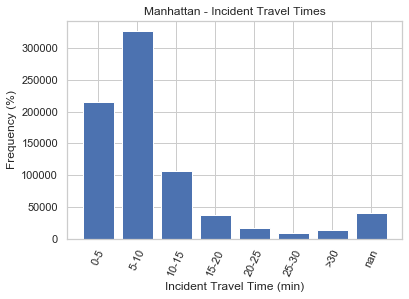

In [67]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30","nan")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins))])

ax.bar(idx, [x[1] for x in travel_mht])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Frequency (%)')
plt.title("Manhattan - Incident Travel Times")

plt.show()

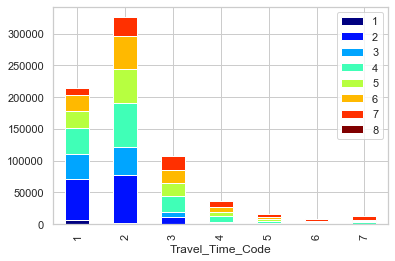

In [68]:
travel_mht_code = data.loc[data["BOROUGH"]=="MANHATTAN"] #filter specifically for rows only with BK first
travel_mht_code = travel_mht_code.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_mht_code_sum = travel_mht_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_mht_code.reindex(index=travel_mht_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.legend(loc=1)
plt.show()

***Queens***

In [69]:
travel_queens = collections.Counter(data[data["BOROUGH"]=="QUEENS"].Travel_Time_Code)
tot_travel_queens = sum(travel_queens.values())
travel_queens = sorted(travel_queens.items())
travel_queens.append(travel_queens.pop(-4)) #move nan row to end
travel_queens

[(1, 164500),
 (2, 288820),
 (3, 74276),
 (4, 17467),
 (5, 5900),
 (6, 2341),
 (7, 2440),
 (nan, 21131)]

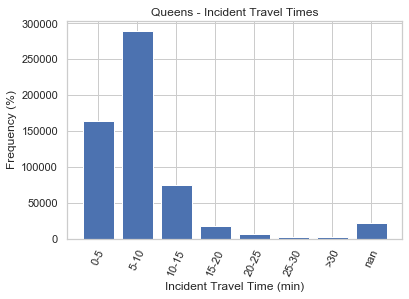

In [71]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30","nan")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins))])

ax.bar(idx, [x[1] for x in travel_queens])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Frequency (%)')
plt.title("Queens - Incident Travel Times")

plt.show()

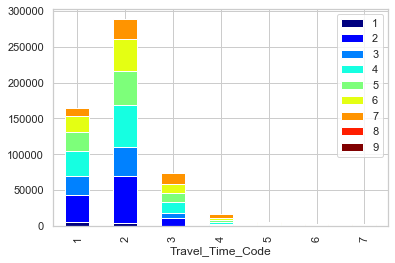

In [72]:
travel_queens_code = data.loc[data["BOROUGH"]=="QUEENS"] #filter specifically for rows only with BK first
travel_queens_code = travel_queens_code.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_queens_code_sum = travel_queens_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_queens_code.reindex(index=travel_queens_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.legend(loc=1)
plt.show()

***Staten Island***

In [73]:
travel_st = collections.Counter(data[data["BOROUGH"]=="RICHMOND / STATEN ISLAND"].Travel_Time_Code)
tot_travel_st = sum(travel_st.values())
travel_st = sorted(travel_st.items())
travel_st.append(travel_st.pop(-5)) #move nan row to end
travel_st

[(1, 40185),
 (2, 61839),
 (3, 13019),
 (4, 3017),
 (5, 927),
 (6, 386),
 (7, 359),
 (nan, 4312)]

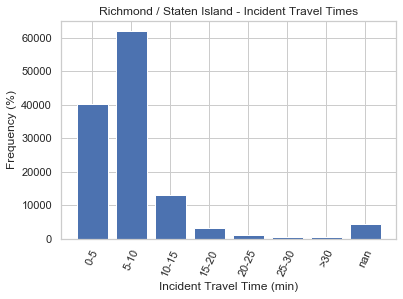

In [75]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30","nan")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins))])

ax.bar(idx, [x[1] for x in travel_st])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Frequency (%)')
plt.title("Richmond / Staten Island - Incident Travel Times")

plt.show()

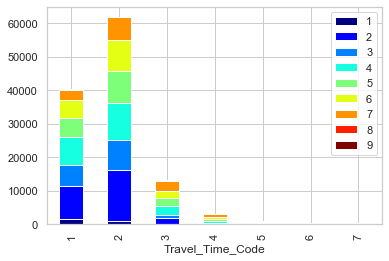

In [76]:
travel_st_code = data.loc[data["BOROUGH"]=="RICHMOND / STATEN ISLAND"] #filter specifically for rows only with BK first
travel_st_code = travel_st_code.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_st_code_sum = travel_st_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_st_code.reindex(index=travel_st_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.legend(loc=1)
plt.show()

***BOROUGH***

In [77]:
borough = collections.Counter(data["BOROUGH"])
tot_borough = sum(borough.values())

In [78]:
borough

Counter({'BROOKLYN': 839336,
         'QUEENS': 576875,
         'MANHATTAN': 762680,
         'BRONX': 698536,
         'RICHMOND / STATEN ISLAND': 124044,
         'UNKNOWN': 17})

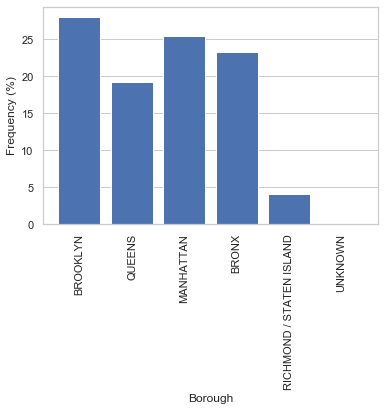

In [79]:
borough = {k: (v*100) / tot_borough for k, v in borough.items()} #mult by 100 to turn into percent
plt.bar(borough.keys(),borough.values())
plt.grid(axis = 'x')
plt.xticks(rotation = 90)
plt.xlabel("Borough")
plt.ylabel("Frequency (%)")
plt.show()

***INITAL SEVERITY LEVEL***

In [80]:
severity_initial = collections.Counter(data["INITIAL_SEVERITY_LEVEL_CODE"])
tot_severity_initial = sum(severity_initial.values())

In [81]:
severity_initial

Counter({2: 634675,
         4: 595233,
         6: 485649,
         3: 378169,
         7: 364029,
         5: 492668,
         1: 42078,
         8: 8959,
         9: 28})

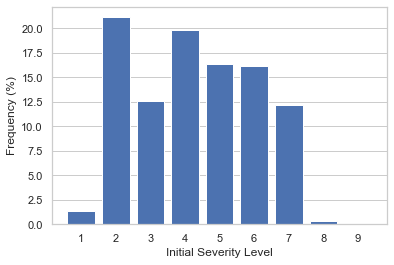

In [82]:
severity_initial = {k: (v*100) / tot_severity_initial for k, v in severity_initial.items()}#mult by 100 to turn into perc
plt.bar(severity_initial.keys(),severity_initial.values())
plt.grid(axis = 'x')
plt.xlabel("Initial Severity Level")
plt.xticks(np.arange(1,10))
plt.ylabel("Frequency (%)")
plt.show()

***INCIDENT DISPOSITIONS*** 

In [83]:
from math import isnan
disp = collections.Counter(data["INCIDENT_DISPOSITION_CODE"])
tot_disp = sum(disp.values())

In [84]:
disp

Counter({82.0: 2089937,
         91.0: 49963,
         93.0: 367002,
         90.0: 271702,
         96.0: 110753,
         nan: 1,
         nan: 1,
         87.0: 69166,
         83.0: 20439,
         nan: 1,
         nan: 1,
         94.0: 2318,
         95.0: 298,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         92.0: 23,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,

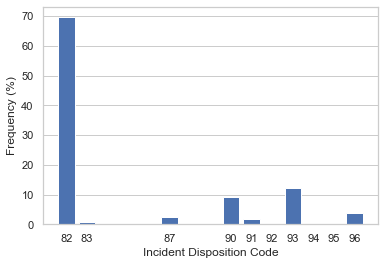

In [85]:
disp = {k: (v*100) / tot_disp for k, v in disp.items()}#mult by 100 to turn into percent
plt.bar(disp.keys(),disp.values())
plt.grid(axis = 'x')
plt.xticks([82,83,87,90,91,92,93,94,95,96])
plt.xlabel("Incident Disposition Code")
plt.ylabel("Frequency (%)")
plt.show()

***HELD_INDICATOR***

In [86]:
held_ind = collections.Counter(data["HELD_INDICATOR"])
tot_held_ind = sum(held_ind.values())
held_ind

Counter({'N': 2855023, 'Y': 146465})

In [87]:
tot_held_ind

3001488

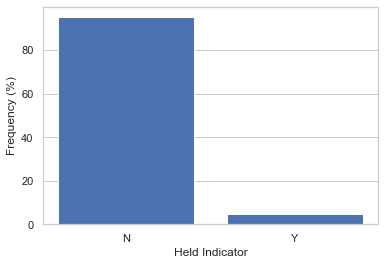

In [88]:
held_ind = {k: (v*100) / tot_held_ind for k, v in held_ind.items()}#mult by 100 to turn into percent
plt.bar(held_ind.keys(),held_ind.values())
plt.grid(axis = 'x')
plt.xlabel("Held Indicator")
plt.ylabel("Frequency (%)")
plt.show()

***STANDBY_INDICATOR***

In [89]:
stby_ind = collections.Counter(data["STANDBY_INDICATOR"])
tot_stby_ind = sum(stby_ind.values())
stby_ind

Counter({'N': 2993558, 'Y': 7930})

In [90]:
tot_stby_ind

3001488

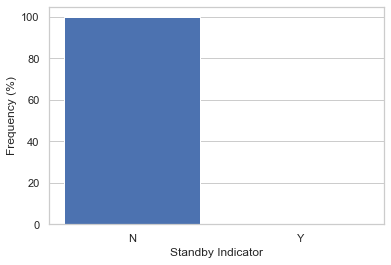

In [91]:
stby_ind = {k: (v*100) / tot_stby_ind for k, v in stby_ind.items()}#mult by 100 to turn into percent
plt.bar(stby_ind.keys(),stby_ind.values())
plt.grid(axis = 'x')
plt.xlabel("Standby Indicator")
plt.ylabel("Frequency (%)")
plt.show()

***SPECIAL EVENT INDICATOR***

In [92]:
spevent_ind = collections.Counter(data["SPECIAL_EVENT_INDICATOR"])
tot_spevent_ind = sum(spevent_ind.values())
spevent_ind

Counter({'N': 3001257, 'Y': 231})

In [93]:
tot_spevent_ind 

3001488

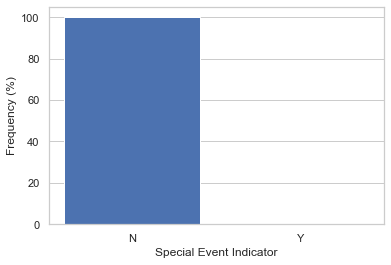

In [94]:
spevent_ind = {k: (v*100) / tot_spevent_ind for k, v in spevent_ind.items()}#mult by 100 to turn into percent
plt.bar(spevent_ind.keys(),spevent_ind.values())
plt.grid(axis = 'x')
plt.xlabel("Special Event Indicator")
plt.ylabel("Frequency (%)")
plt.show()

***INCIDENT DISPATCH AREA***

In [95]:
disp_area = collections.Counter(data["INCIDENT_DISPATCH_AREA"])
tot_disp_area = sum(disp_area.values())
disp_area

Counter({'K6': 102541,
         'Q3': 65195,
         'Q6': 156625,
         'K1': 127004,
         'M3': 148227,
         'K4': 207034,
         'Q5': 33275,
         'B3': 137203,
         'Q1': 42279,
         'B2': 211093,
         'K5': 78454,
         'M1': 90028,
         'K7': 123081,
         'S1': 62190,
         'Q2': 156051,
         'B1': 174583,
         'K3': 94897,
         'B4': 82405,
         'K2': 106911,
         'M8': 40384,
         'M4': 59578,
         'M2': 142253,
         'M5': 79599,
         'M7': 92325,
         'Q7': 66910,
         'M9': 84105,
         'B5': 92904,
         'S3': 15509,
         'Q4': 55953,
         'M6': 25574,
         'S2': 46220,
         'X1': 460,
         'CW': 613,
         'X2': 14,
         'X3': 3,
         'X4': 2,
         'X5': 3,
         'C1': 1,
         'BO': 2})

In [96]:
tot_disp_area

3001488

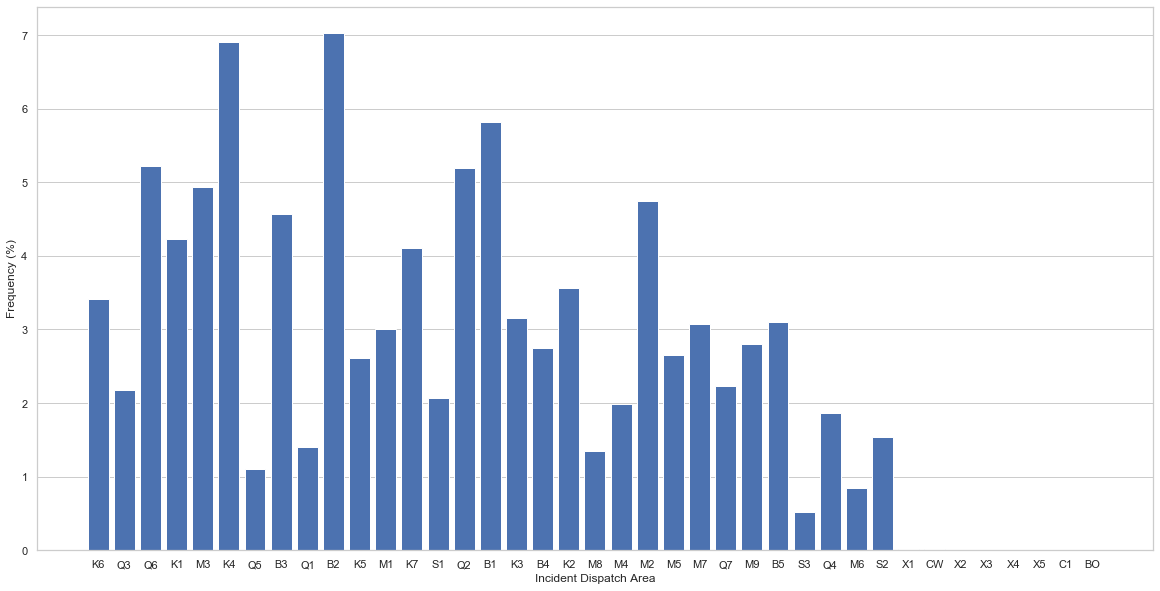

In [97]:
disp_area = {k: (v*100) / tot_disp_area for k, v in disp_area.items()}#mult by 100 to turn into percent

plt.figure(figsize =(20,10))
plt.bar(disp_area.keys(),disp_area.values())
plt.grid(axis = 'x')
plt.xlabel("Incident Dispatch Area")
plt.ylabel("Frequency (%)")
plt.show()

In [98]:
new = data

In [103]:
new1 = new.groupby('INCIDENT_DISPATCH_AREA')['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe()

In [113]:
new1["Outliers"] = new1["75%"]+1.5*(new1["75%"]-new1["25%"])

In [114]:
new1

,count,mean,std,min,25%,50%,75%,max,Outliers
INCIDENT_DISPATCH_AREA,,,,,,,,,
B1,169520.0,551.351652,452.470334,0.0,299.0,439.0,657.0,18465.0,1194.0
B2,205534.0,515.688908,416.130157,0.0,293.0,419.0,610.0,16690.0,1085.5
B3,133568.0,502.161596,343.099855,0.0,311.0,437.0,603.0,20875.0,1041.0
B4,79743.0,484.118004,327.675117,0.0,300.0,418.0,584.0,14141.0,1010.0
B5,90155.0,485.709889,367.524931,0.0,290.0,412.0,582.0,14684.0,1020.0
BO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1,1.0,9.000000,NaN,9.0,9.0,9.0,9.0,9.0,9.0
CW,577.0,889.984402,1583.975622,0.0,0.0,14.0,1553.0,24317.0,3882.5
K1,123897.0,481.176760,334.823359,0.0,291.0,412.0,578.0,16928.0,1008.5


In [124]:
data["FIRST_ASSIGNMENT_DATETIME"].dt.month[:5]

0    12.0
1     1.0
2     1.0
3    12.0
4     1.0
Name: FIRST_ASSIGNMENT_DATETIME, dtype: float64

Text(0.5, 1.0, 'Side-by-Side Histogram per Month')

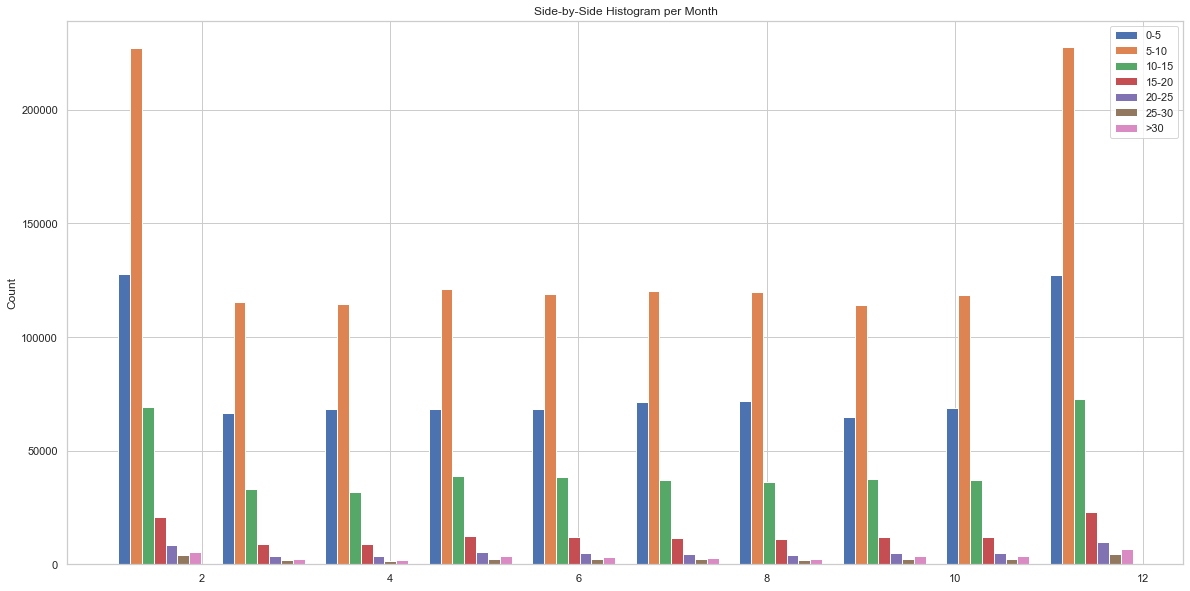

In [168]:
plt.figure(figsize =(20,10))

x1 = list(data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x2 = list(data[data['Travel_Time_Code']==2]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x3 = list(data[data['Travel_Time_Code']==3]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x4 = list(data[data['Travel_Time_Code']==4]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x5 = list(data[data['Travel_Time_Code']==5]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x6 = list(data[data['Travel_Time_Code']==6]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x7 = list(data[data['Travel_Time_Code']==7]['FIRST_ASSIGNMENT_DATETIME'].dt.month)

# Assign colors for each airline and the names
names = ["0-5","5-10","10-15","15-20","20-25","25-30",">30"]
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5,x6,x7],
         label=names)

# Plot formatting
plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Side-by-Side Histogram per Month')

In [170]:
x1 = list(data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x2 = list(data[data['Travel_Time_Code']==2]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x3 = list(data[data['Travel_Time_Code']==3]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x4 = list(data[data['Travel_Time_Code']==4]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x5 = list(data[data['Travel_Time_Code']==5]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x6 = list(data[data['Travel_Time_Code']==6]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x7 = list(data[data['Travel_Time_Code']==7]['FIRST_ASSIGNMENT_DATETIME'].dt.month)



[12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,


In [172]:
a = data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month
a.unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [166]:
# x1 = list(data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
a = data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month


In [185]:
from collections import Counter

X1 = pd.DataFrame([Counter(a).keys(),Counter(a).values() ])
X1

,0,1,2,3,4,5,6,7,8,9,10,11
0,12,11,10,9,8,7,6,5,4,3,2,1
1,63184,63992,68850,64855,71821,71388,68221,68516,68288,66394,62314,65302


In [186]:
x1 = data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x2 = data[data['Travel_Time_Code']==2]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x3 = data[data['Travel_Time_Code']==3]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x4 = data[data['Travel_Time_Code']==4]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x5 = data[data['Travel_Time_Code']==5]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x6 = data[data['Travel_Time_Code']==6]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x7 = data[data['Travel_Time_Code']==7]['FIRST_ASSIGNMENT_DATETIME'].dt.month

X1 = pd.DataFrame([Counter(x1).keys(),Counter(x1).values() ])
X2 = pd.DataFrame([Counter(x2).keys(),Counter(x2).values() ])
X3 = pd.DataFrame([Counter(x3).keys(),Counter(x3).values() ])
X4 = pd.DataFrame([Counter(x4).keys(),Counter(x4).values() ])
X5 = pd.DataFrame([Counter(x5).keys(),Counter(x5).values() ])
X6 = pd.DataFrame([Counter(x6).keys(),Counter(x6).values() ])
X7 = pd.DataFrame([Counter(x7).keys(),Counter(x7).values() ])


In [190]:
X1 = pd.DataFrame([Counter(x1).keys(),Counter(x1).values() ])
X2 = pd.DataFrame([Counter(x2).keys(),Counter(x2).values() ])
X3 = pd.DataFrame([Counter(x3).keys(),Counter(x3).values() ])
X4 = pd.DataFrame([Counter(x4).keys(),Counter(x4).values() ])
X5 = pd.DataFrame([Counter(x5).keys(),Counter(x5).values() ])
X6 = pd.DataFrame([Counter(x6).keys(),Counter(x6).values() ])
X7 = pd.DataFrame([Counter(x7).keys(),Counter(x7).values() ])


In [193]:
frame_combined = pd.concat([X1 , X2], ignore_index=False)
frame_combined

,0,1,2,3,4,5,6,7,8,9,10,11
0,12,11,10,9,8,7,6,5,4,3,2,1
1,63184,63992,68850,64855,71821,71388,68221,68516,68288,66394,62314,65302
0,12,1,11,10,9,8,7,6,5,4,3,2
1,115856,119192,111865,118364,114089,119725,120409,118828,120899,114341,115248,107914


In [199]:
X1 = pd.Series(Counter(x1).values(), index=Counter(x1).keys())

ValueError: Length of passed values is 1, index implies 12

In [198]:
X1

12    (63184, 63992, 68850, 64855, 71821, 71388, 682...
11    (63184, 63992, 68850, 64855, 71821, 71388, 682...
10    (63184, 63992, 68850, 64855, 71821, 71388, 682...
9     (63184, 63992, 68850, 64855, 71821, 71388, 682...
8     (63184, 63992, 68850, 64855, 71821, 71388, 682...
7     (63184, 63992, 68850, 64855, 71821, 71388, 682...
6     (63184, 63992, 68850, 64855, 71821, 71388, 682...
5     (63184, 63992, 68850, 64855, 71821, 71388, 682...
4     (63184, 63992, 68850, 64855, 71821, 71388, 682...
3     (63184, 63992, 68850, 64855, 71821, 71388, 682...
2     (63184, 63992, 68850, 64855, 71821, 71388, 682...
1     (63184, 63992, 68850, 64855, 71821, 71388, 682...
dtype: object

***MAPS***

In [2]:
pip install pyshp

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install descartes

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2019.07=py37_0
  - defaults/osx-64::numba==0.44.1=py37h6440ff4_0
done

## Package Plan ##

  environment location: //anaconda3

  added / updated specs:
    - descartes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           6 KB
    anaconda-custom            |           py37_1           3 KB
    ca-certificates-2019.10.16 |                0         131 KB
    certifi-2019.9.11          |           py37_0         154 KB
    openssl-1.1.1d             |       h1de35cc_3         3.4 MB
    tbb-2019.8                 |       h04f5b5a_0         149 KB
    ------------------------------------------------------------
                                           Tota

In [5]:
import shapefile as shp
import geopandas as gpd
%matplotlib inline

In [6]:
sf = shp.Reader('ZIP_CODE_040114.shp')

In [7]:
len(sf.shapes())

263

In [12]:
sf.records()[1]

Record #1: ['11213', '0', 'Brooklyn', 62426.0, 29631004.437939, 'NY', 'Kings', '36', '047', 'http://www.usps.com/', 0.0, 0.0]

In [13]:
#used from Towards Data Science blog post, https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [14]:
df = read_shapefile(sf)
df.shape

(263, 13)

In [15]:
df.sample(10)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,coords
160,11004,0,Glen Oaks,11776.0,2.260653e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"[(1064411.4918958098, 212668.8611293882), (106..."
213,10174,1,New York,0.0,4.420323e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"[(990971.7611508965, 213125.5675650537), (9910..."
231,10158,1,New York,0.0,3.539577e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"[(991057.6602573097, 212137.58725754917), (991..."
82,10001,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"[(981958.6472873986, 213464.45304213464), (981..."
193,10022,0,New York,33135.0,1.272834e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"[(991852.9732992351, 217950.69571004808), (991..."
249,10259,1,New York,0.0,2.106431e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"[(981377.1481223106, 197499.8675172925), (9814..."
31,10460,0,Bronx,56670.0,3.515567e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"[(1018310.7186119705, 250944.48011605442), (10..."
223,10110,1,New York,0.0,2.124906e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"[(989343.2968881428, 213959.7719333768), (9893..."
87,10010,0,New York,29881.0,9.768396e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"[(987500.0003778934, 210146.43769654632), (987..."
36,10031,0,New York,57010.0,1.690215e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"[(1000830.0386783928, 241801.58960922062), (10..."


In [16]:
#used from Towards Data Science blog post, https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
    
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [19]:
import matplotlib.pyplot as plt

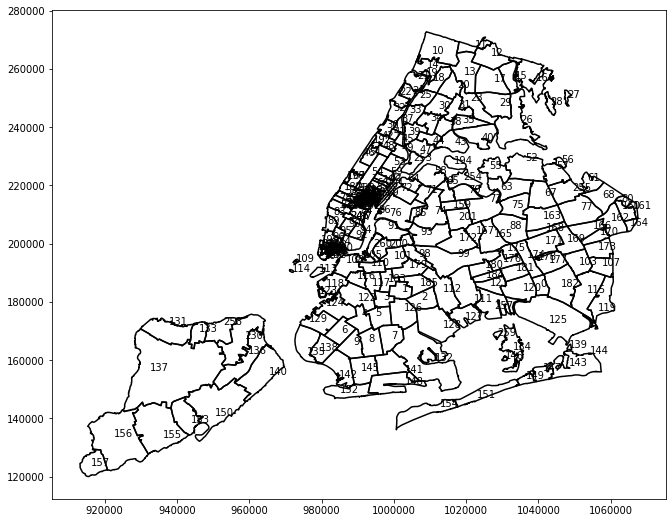

In [20]:
plot_map(sf)

In [ ]:
def calc_color(data, color=None):
        if color   == 1: color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; colors = 'YlGnBu';
        elif color == 3: color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; colors = 'Greys';
        elif color == 9: color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return (color_ton, bins)

In [ ]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
def plot_zipcode_data(sf, title, zipcode, data=None, color=None, print_id=False):

    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    zipcode_id = []
    for i in zipcode:
        zipcode_id.append(df[df.ZIPCODE == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, zipcode_id, print_id, color_ton, bins, x_lim = None, y_lim = None, figsize = (11,9))

In [ ]:
zipcode_id = []
for i in test_index:
    zipcode_id.append(df[df.ZIPCODE == i].index.get_values()[0])

In [ ]:
df[df.ZIPCODE == "10005"].index.get_values()[0]

In [ ]:
print_id = True
color_pallete = 1 

In [ ]:
plot_zipcode_data(sf, 'NYC', test_index, test_time, color_pallete, print_id)